In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Nashmill Store.csv'
nashmill_data = pd.read_csv(file_path)

nashmill_data.head()


,Transaction ID,Receipt Number,P date,Type,Quantity((M&K),Revenue,Product ID,Color,Customer ID,COGS,Roll(number of product),Time,PRODUCT TYPE,Date
0,1,2,115,5,453.00,79275000.0,145811-064,64,111,64767132.0,10,1907.0,Toor,1/15/23
1,2,1,115,4,2.98,5110944.5,145385-010,10,2,5110944.5,1,1908.0,Dantel,1/15/23
2,3,1,115,4,12.70,24869521.0,145691-010 B+,10,2,24869521.0,2,1908.0,Dantel,1/15/23
3,4,1,115,4,5.90,11455132.0,145694-010 B+,10,2,11455132.0,1,1908.0,Dantel,1/15/23
4,5,1,115,4,6.25,12133261.0,145690-010 B+,10,2,12133261.0,2,1908.0,Dantel,1/15/23


## Data Cleaning
Here we will perform data cleaning and preparation activities to ensure our dataset is ready for analysis.



In [35]:
# Check for missing values
nashmill_data.isnull().sum()

# Handle missing values
nashmill_data['Quantity((M&K)'].fillna(nashmill_data['Quantity((M&K)'].mean(), inplace=True)

# Correct data types if necessary
nashmill_data['P date'] = pd.to_datetime(nashmill_data['P date'], errors='coerce')

# Remove duplicates
nashmill_data.drop_duplicates(inplace=True)

# Display cleaned dataset info
nashmill_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516 entries, 0 to 9515
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Transaction ID           9516 non-null   int64         
 1   Receipt Number           9516 non-null   int64         
 2   P date                   9516 non-null   datetime64[ns]
 3   Type                     9516 non-null   int64         
 4   Quantity((M&K)           9516 non-null   float64       
 5   Revenue                  9516 non-null   float64       
 6   Product ID               9516 non-null   object        
 7   Color                    9516 non-null   int64         
 8   Customer ID              9516 non-null   int64         
 9   COGS                     9516 non-null   float64       
 10  Roll(number of product)  9516 non-null   int64         
 11  Time                     8257 non-null   float64       
 12  PRODUCT TYPE             9516 non-

## Issue Analysis
### Issue 1: Customer Preferences
- Identify popular fabric patterns
- Identify popular fabric colors


In [36]:
filtered_data = nashmill_data[nashmill_data['Type'] == 5]
filtered_data.head()

,Transaction ID,Receipt Number,P date,Type,Quantity((M&K),Revenue,Product ID,Color,Customer ID,COGS,Roll(number of product),Time,PRODUCT TYPE,Date
0,1,2,1970-01-01 00:00:00.000000115,5,453.00,79275000.0,145811-064,64,111,64767132.0,10,1907.0,Toor,1/15/23
16,17,8,1970-01-01 00:00:00.000000116,5,21.31,53236136.0,145623-000 B,0,111,40948211.0,5,1937.0,Dantel,1/16/23
17,18,8,1970-01-01 00:00:00.000000116,5,6.05,15117513.0,145623-172 B,172,111,11628100.0,1,1937.0,Dantel,1/16/23
18,19,8,1970-01-01 00:00:00.000000116,5,11.53,28798238.0,145709-000 B+,0,111,22151050.0,4,1937.0,Dantel,1/16/23
19,20,8,1970-01-01 00:00:00.000000116,5,4.75,11869121.0,145709-010 B+,10,111,9343250.0,1,1937.0,Dantel,1/16/23


/var/folders/w3/wx32x_5x1zb1lh5pwy851xfc0000gn/T/ipykernel_19041/2504592457.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
/var/folders/w3/wx32x_5x1zb1lh5pwy851xfc0000gn/T/ipykernel_19041/2504592457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
/var/folders/w3/wx32x_5x1zb1lh5pwy851xfc0000gn/T/ipykernel_19041/2504592457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

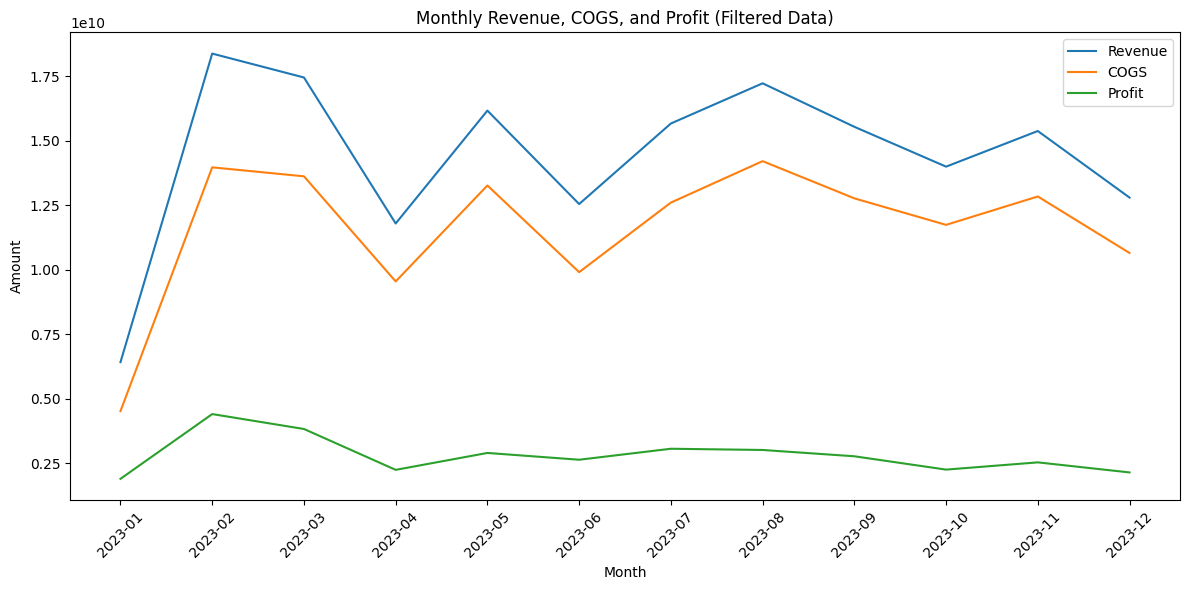

In [37]:


# Ensure 'Date' column is in datetime format
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

# Create 'YearMonth' column
filtered_data['YearMonth'] = filtered_data['Date'].dt.to_period('M')

# Calculate monthly revenue and COGS
filtered_monthly_data = filtered_data.groupby('YearMonth').agg({
    'Revenue': 'sum',
    'COGS': 'sum'
}).reset_index()

# Calculate profit
filtered_monthly_data['Profit'] = filtered_monthly_data['Revenue'] - filtered_monthly_data['COGS']

# Plot monthly revenue, COGS, and profit
plt.figure(figsize=(12, 6))
plt.plot(filtered_monthly_data['YearMonth'].astype(str), filtered_monthly_data['Revenue'], label='Revenue')
plt.plot(filtered_monthly_data['YearMonth'].astype(str), filtered_monthly_data['COGS'], label='COGS')
plt.plot(filtered_monthly_data['YearMonth'].astype(str), filtered_monthly_data['Profit'], label='Profit')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Revenue, COGS, and Profit (Filtered Data)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
# Analyze the most popular fabric patterns
popular_patterns = nashmill_data['PRODUCT TYPE'].value_counts().head(10)

# Analyze the revenue generated by different fabric patterns
pattern_revenue = nashmill_data.groupby('PRODUCT TYPE')['Revenue'].sum().sort_values(ascending=False).head(10)

# Analyze the most popular fabric colors
popular_colors = nashmill_data['Color'].value_counts().head(10)

# Analyze the revenue generated by different fabric colors
color_revenue = nashmill_data.groupby('Color')['Revenue'].sum().sort_values(ascending=False).head(10)

popular_patterns, pattern_revenue, popular_colors, color_revenue


(PRODUCT TYPE
 Sanol     2624
 Dantel    2050
 Other     1820
 Toor      1797
 Harir     1225
 Name: count, dtype: int64,
 PRODUCT TYPE
 Other     9.557925e+10
 Sanol     7.622870e+10
 Dantel    7.066767e+10
 Harir     5.371373e+10
 Toor      5.348206e+10
 Name: Revenue, dtype: float64,
 Color
 10     1709
 2       758
 1       391
 54      309
 49      288
 0       263
 60      193
 102     191
 9       180
 57      151
 Name: count, dtype: int64,
 Color
 10     8.048175e+10
 2      3.935735e+10
 101    2.089130e+10
 54     1.667963e+10
 1      1.461706e+10
 49     1.440299e+10
 0      8.085317e+09
 102    6.002200e+09
 60     5.776585e+09
 9      5.279096e+09
 Name: Revenue, dtype: float64)

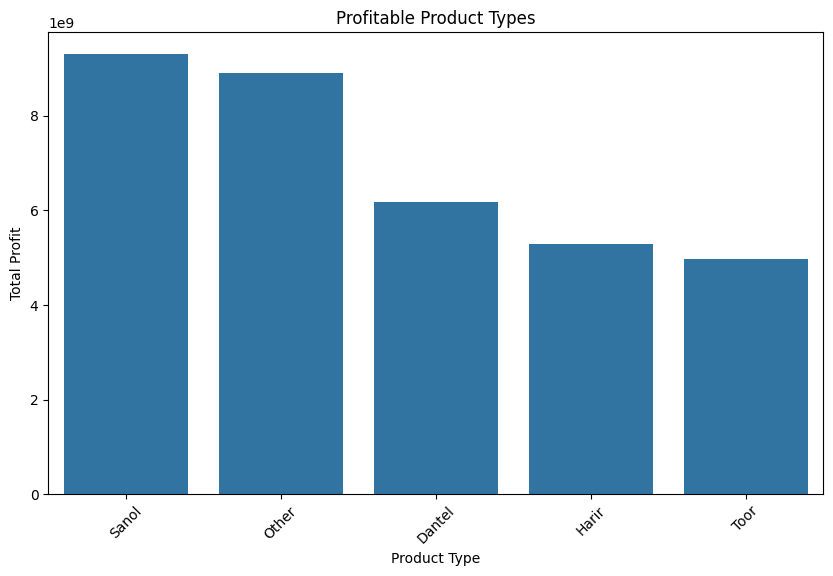

In [46]:

# Create a new column 'Profit'
nashmill_data['Profit'] = nashmill_data['Revenue'] - nashmill_data['COGS']

# Analyze and visualize the most profitable product types
profit_by_product_type = nashmill_data.groupby('PRODUCT TYPE')['Profit'].sum().nlargest(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_product_type.index, y=profit_by_product_type.values)
plt.title('Profitable Product Types')
plt.xticks(rotation=45)
plt.ylabel('Total Profit')
plt.xlabel('Product Type')
plt.show()


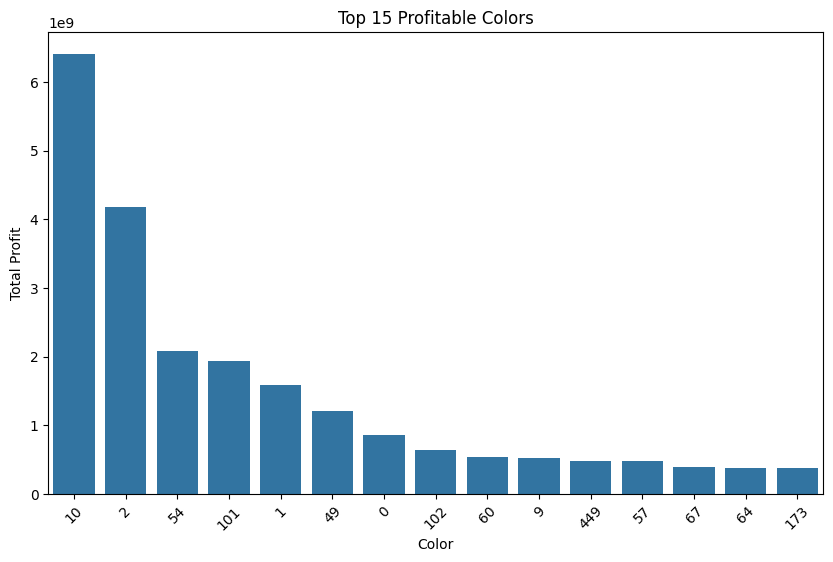

In [23]:
# Analyze and visualize the most profitable colors
profit_by_color = nashmill_data.groupby('Color')['Profit'].sum().sort_values(ascending=False).head(15)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_color.index, y=profit_by_color.values, order=profit_by_color.index)
plt.title('Top 15 Profitable Colors')
plt.xticks(rotation=45)
plt.ylabel('Total Profit')
plt.xlabel('Color')
plt.show()



### Issue 2: Marketing Strategies



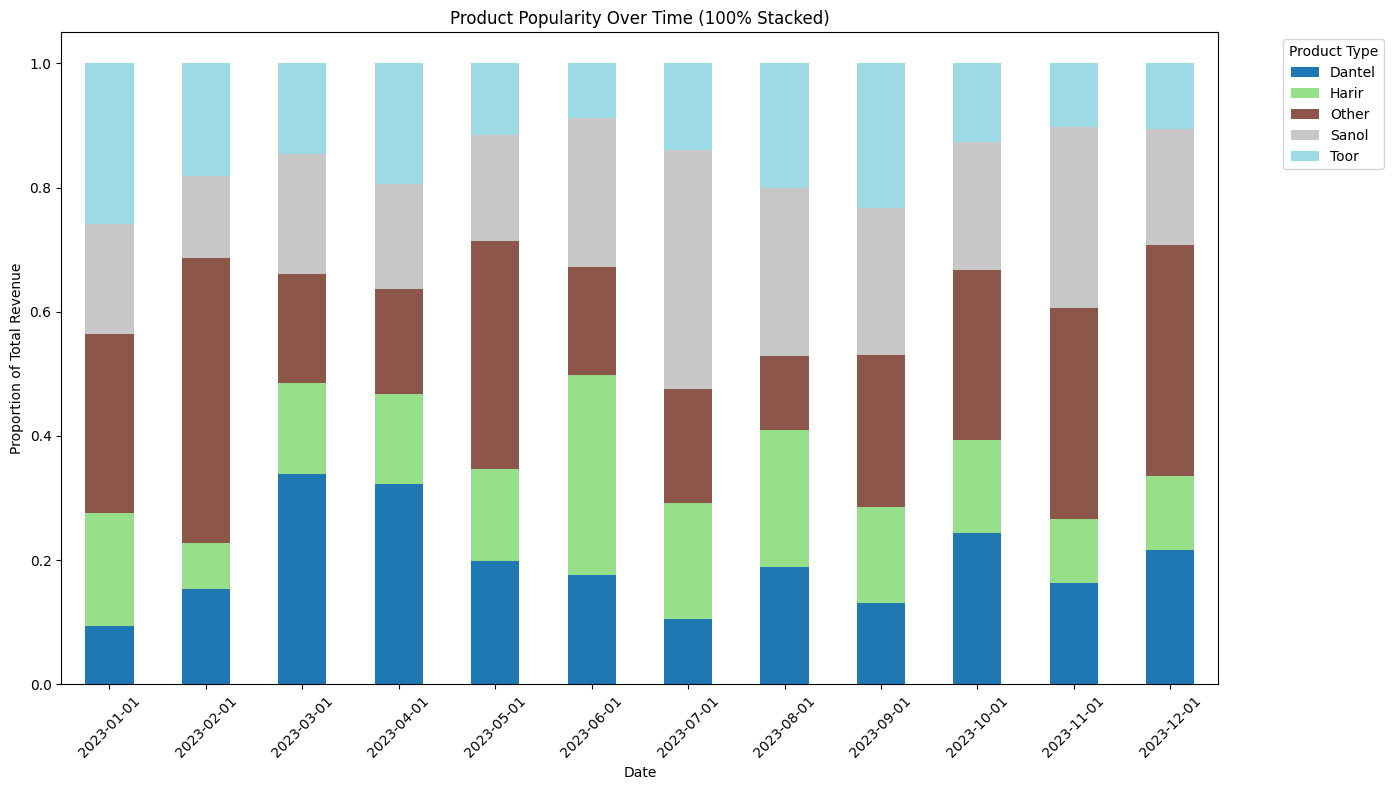

In [48]:
# Ensure 'Date' column is in datetime format
nashmill_data['Date'] = pd.to_datetime(nashmill_data['Date'])

# Filter data for type 5
filtered_data = nashmill_data[nashmill_data['Type'] == 5]

# Grouping by month and product type to see trends over time
monthly_sales = filtered_data.groupby([filtered_data['Date'].dt.to_period('M'), 'PRODUCT TYPE']).agg({'Revenue': 'sum'}).reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

# Cast 'Date' column to date
monthly_sales['Date'] = monthly_sales['Date'].dt.date

# Pivot table to get product types as columns and dates as rows
pivot_table = monthly_sales.pivot_table(index='Date', columns='PRODUCT TYPE', values='Revenue', aggfunc='sum', fill_value=0)

# Calculate the proportion for each product type
proportions = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plotting the 100% stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

plt.title('Product Popularity Over Time (100% Stacked)')
plt.xlabel('Date')
plt.ylabel('Proportion of Total Revenue')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





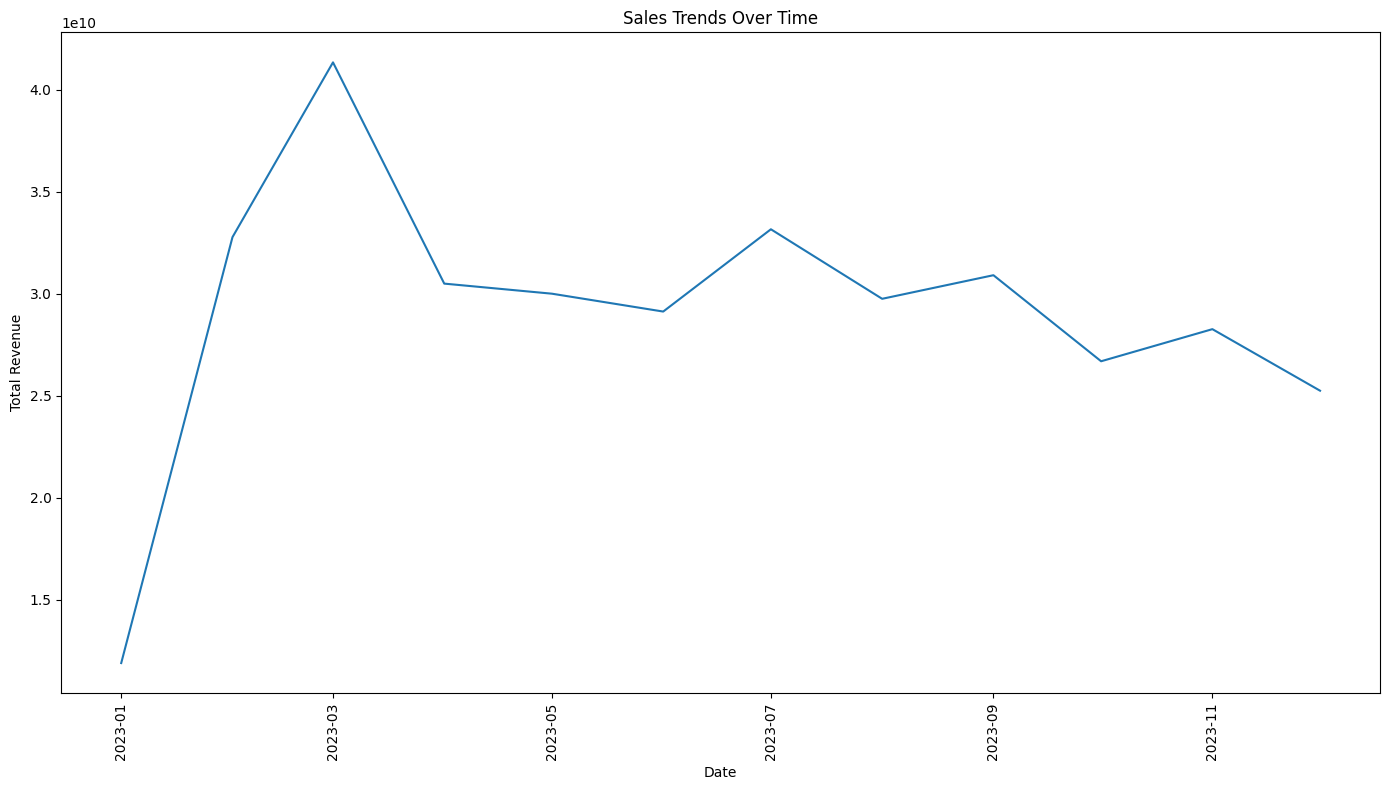

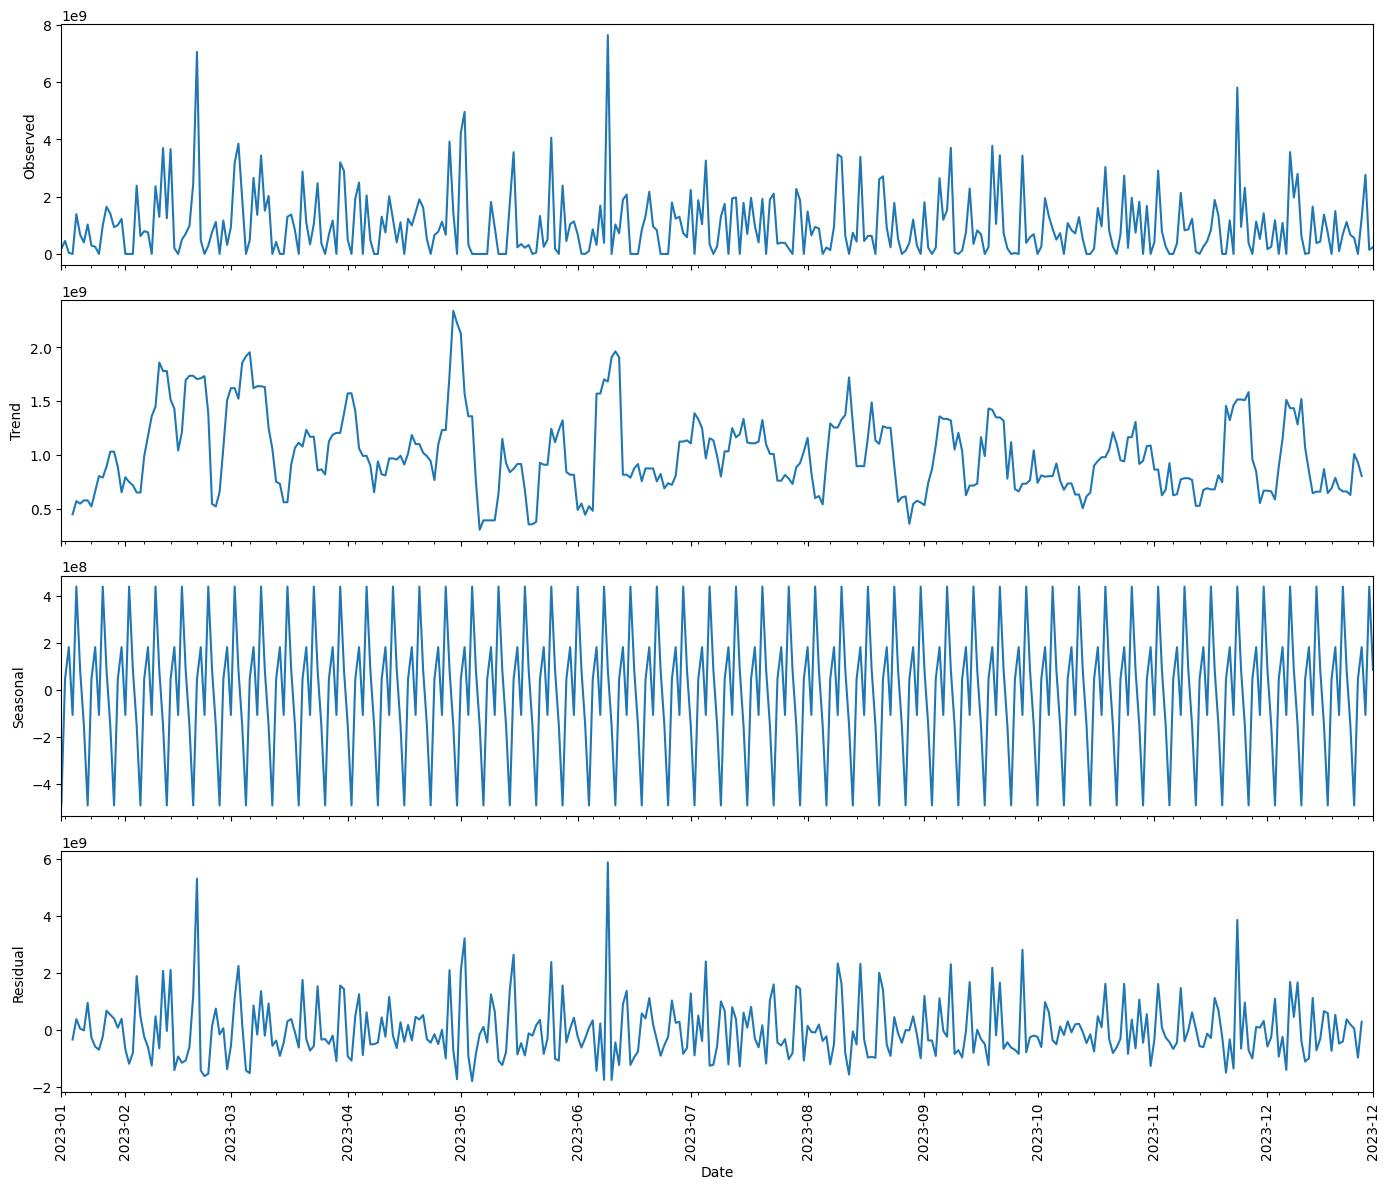

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'Date' column is in datetime format
nashmill_data['Date'] = pd.to_datetime(nashmill_data['Date'])
filtered_data = nashmill_data[nashmill_data['Type'] == 5]

# Grouping by month to see overall trends
monthly_trends = nashmill_data.groupby(nashmill_data['Date'].dt.to_period('M')).agg({'Revenue': 'sum'}).reset_index()
monthly_trends['Date'] = monthly_trends['Date'].dt.to_timestamp()

# Plotting overall sales trends
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Revenue', data=monthly_trends)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()

# Seasonal decomposition
# Assuming daily data for decomposition, resample as needed
daily_data = nashmill_data.set_index('Date').resample('D').agg({'Revenue': 'sum'}).fillna(0)
decomposition = seasonal_decompose(daily_data['Revenue'], model='additive')

# Plot seasonal decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')
ax4.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
ax4.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()







### Issue 3: Product Offerings
- Adjust inventory based on customer demand
- Discontinue unpopular products


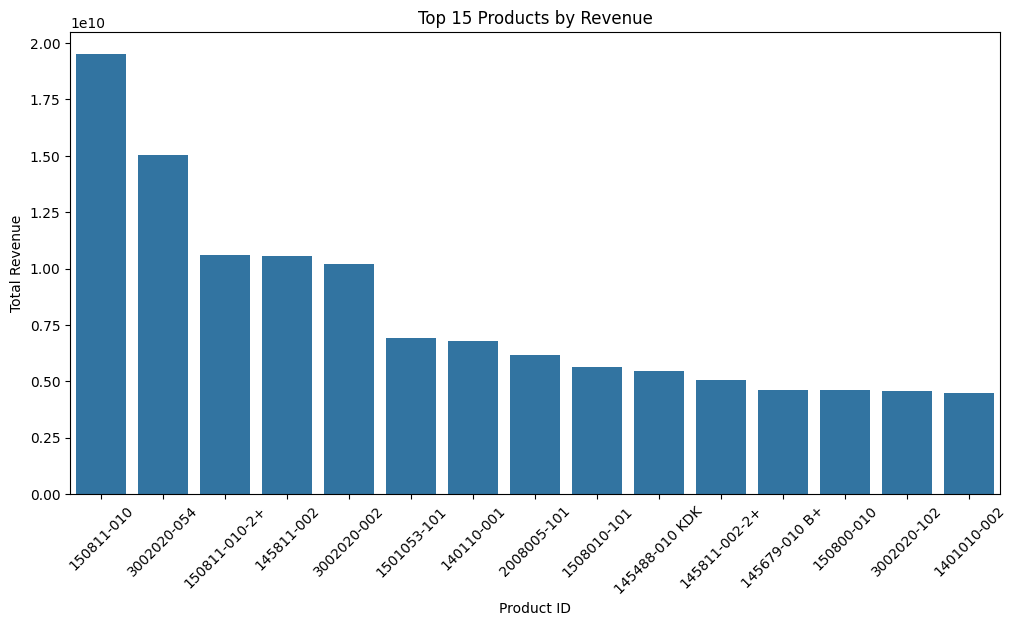

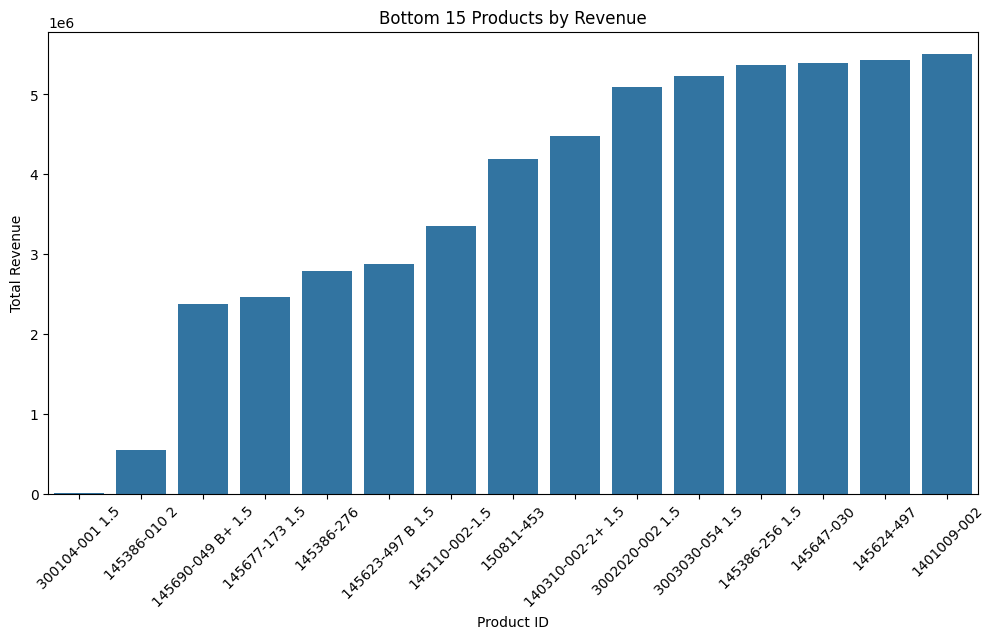

In [44]:
# Ensure 'Date' column is in datetime format
nashmill_data['Date'] = pd.to_datetime(nashmill_data['Date'])
filtered_data = nashmill_data[nashmill_data['Type'] == 5]

# Calculate total sales for each product
product_sales = nashmill_data.groupby('Product ID')['Revenue'].sum().sort_values(ascending=False)
top_products = product_sales.head(15)
bottom_products = product_sales.tail(15).sort_values(ascending=True)  # Ensure ascending order

# Plot top 15 products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 15 Products by Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Plot bottom 15 products in ascending order
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_products.index, y=bottom_products.values)
plt.title('Bottom 15 Products by Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()




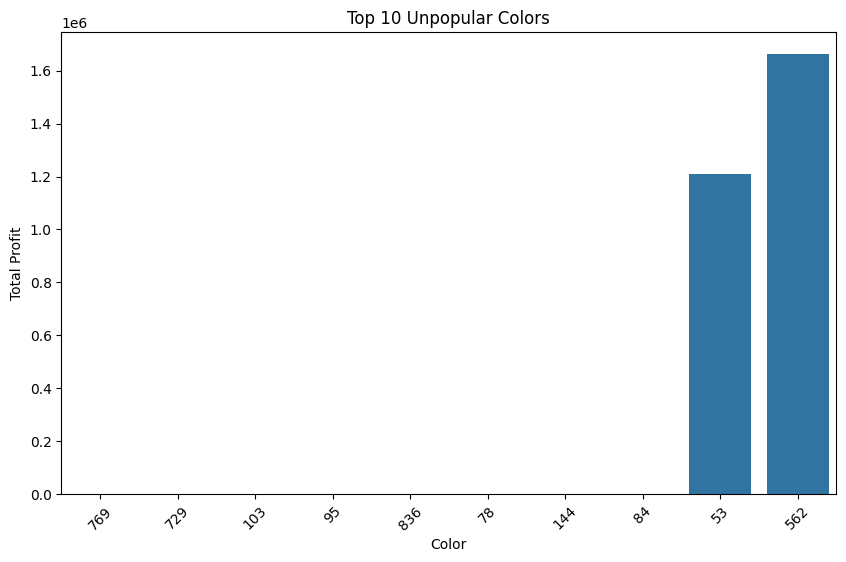

In [50]:
# Analyze and visualize the least profitable colors
unpopular_colors = nashmill_data.groupby('Color')['Profit'].sum().sort_values(ascending=True).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=unpopular_colors.index, y=unpopular_colors.values, order=unpopular_colors.index)
plt.title('Top 10 Unpopular Colors')
plt.xticks(rotation=45)
plt.ylabel('Total Profit')
plt.xlabel('Color')
plt.show()


In [45]:
filtered_data = nashmill_data[nashmill_data['Type'] == 5]
# Suggest increasing inventory for top products
top_products_inventory_suggestions = top_products.index.tolist()
print("Recommended products to increase inventory:", top_products_inventory_suggestions)

# Suggest optimal stock levels based on sales trends (example calculation)
average_monthly_sales = nashmill_data.groupby([nashmill_data['Date'].dt.to_period('M'), 'Product ID'])['Revenue'].mean().reset_index()
optimal_stock_levels = average_monthly_sales.groupby('Product ID')['Revenue'].mean().sort_values(ascending=False)
print("Optimal stock levels based on average monthly sales:\n", optimal_stock_levels)


Recommended products to increase inventory: ['150811-010', '3002020-054', '150811-010-2+', '145811-002', '3002020-002', '1501053-101', '140110-001', '2008005-101', '1508010-101', '145488-010 KDK', '145811-002-2+', '145679-010 B+', '150800-010', '3002020-102', '1401010-002']
Optimal stock levels based on average monthly sales:
 Product ID
1401010-089          4.143089e+08
150800-049           3.384912e+08
1501025-101-2+       3.354678e+08
145729-010 KDK       3.010292e+08
1401010-087          2.642258e+08
                         ...     
145690-049 B+ 1.5    2.374969e+06
150811-453           2.092207e+06
3002020-002 1.5      1.696948e+06
145386-010 2         5.407875e+05
300104-001 1.5       7.800000e+03
Name: Revenue, Length: 681, dtype: float64


Recommended products to discontinue: ['300104-001 1.5', '145386-010 2', '145690-049 B+ 1.5', '145677-173 1.5', '145386-276', '145623-497 B 1.5', '145110-002-1.5', '150811-453', '140310-002-2+ 1.5', '3002020-002 1.5', '3003030-054 1.5', '145386-256 1.5', '145647-030', '145624-497', '1401009-002', '145611-497', '145384-494', '1401033-002', '145647-256', '145672-628 +']


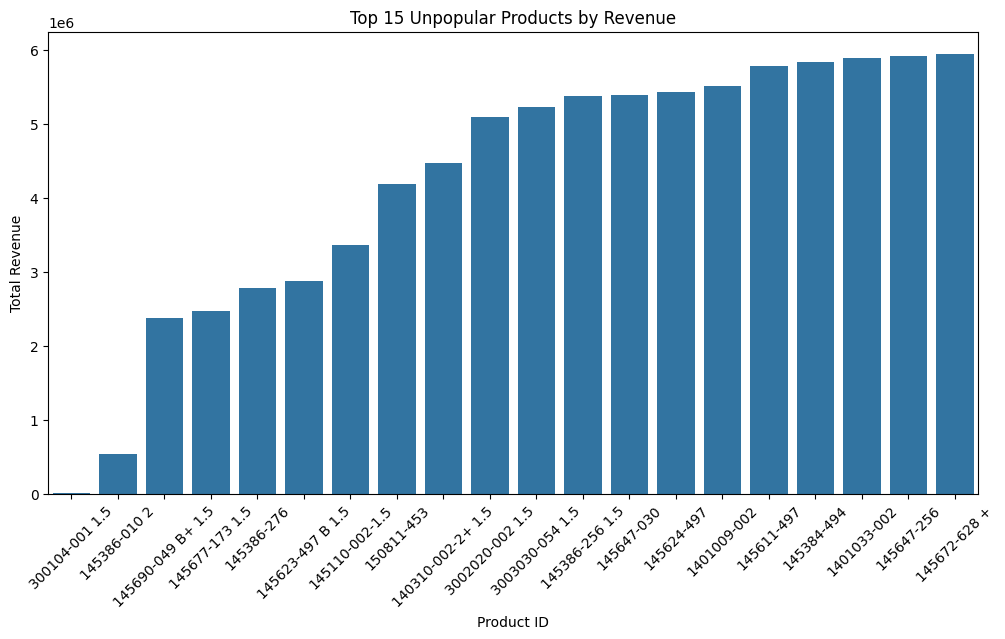

In [33]:
# Identify products with consistently low sales
low_sales_threshold = product_sales.quantile(0.25)
unpopular_products = product_sales[product_sales <= low_sales_threshold].sort_values().head(20)

# Print the list of recommended products to discontinue
print("Recommended products to discontinue:", unpopular_products.index.tolist())

# Plot the top 15 unpopular products
plt.figure(figsize=(12, 6))
sns.barplot(x=unpopular_products.index, y=unpopular_products.values)
plt.title('Top 15 Unpopular Products by Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



### Insights


## 1. Profitable Products
The analysis identified the top most profitable products based on total revenue generated. These products significantly contribute to the overall profit of the Nashmill Store. Increasing inventory for these high-demand products can further enhance profitability.

Top 5 Profitable Products(product ID) by Revenue:

- 1401010-089: 414 M 
- 150800-049: 338 M
- 1501025-101-2+: 335 M
- 145729-010 KDK: 301 M
- 1401010-087: 264 M

Recommendation:
Increase inventory and focus marketing efforts on these high-demand products to maximize profit.

## 2. Profitable Colors
Insight:
Certain colors generate higher revenue, indicating strong customer preferences for these colors. The top 5 most profitable colors have been identified, and focusing on these can drive sales.

Top 5 Profitable Colors by Revenue:

- 10(Black)     804 M
- 2(Off White)  393 M
- 1(White)      208 M
- 54(Cream)     166 M
- 49(Red)       144 M
Recommendation:
Tailor marketing strategies and inventory management to ensure these popular colors are always in stock.

## 3. Unpopular Products
Insight:
The analysis identified the bottom 5 products with the lowest sales. These products contribute minimally to revenue and occupy valuable inventory space. Discontinuing these products can optimize inventory and reduce holding costs.

Top 5 Unpopular Products(product ID) by Revenue:

- 300104-001 1.5
- 145386-010 2
- 145690-049 B+ 1.5
- 145677-173 1.5
- 145386-276 

Recommendation:
Discontinue these low-demand products to free up inventory space for more profitable items.

## 4. Unpopular Colors
Insight:
Some colors have consistently low sales, indicating a lack of customer interest. Identifying and minimizing these colors can help in better inventory management.

Unpopular Colors:

- Color 769(Neon Yellow)
- Color 729(Neon Green)
- Color 103(Hazel)
- Color 95 (Light Silver)
- Color 836(Dark Green)
- Color 144(Dark pink)
- Color 84(Dark silver)

Recommendation:
Reduce or eliminate inventory for these low-demand colors to optimize stock levels and improve sales efficiency.

## Overall Recommendations
- Increase Inventory for Profitable Products and Colors:
Focus on maintaining adequate stock levels for high-demand products and popular colors.
Implement targeted marketing campaigns to boost sales of these items.

- Discontinue Unpopular Products and Colors:
Identify and phase out low-demand products and colors to optimize inventory space.
Use the freed-up inventory space to stock more of the high-demand items.

- Optimize Inventory Management:
Use data-driven insights to make informed decisions about stock levels.
Regularly review sales data to adjust inventory and marketing strategies accordingly.

- Tailored Marketing Strategies:
Develop promotions and marketing campaigns based on the most profitable products and colors.
Utilize customer preferences data to create personalized marketing messages.

# Implementation Plan

## Short-Term Actions (0-3 months):
Increase inventory for the top 15 profitable products and colors.
Discontinue the bottom 15 products and low-demand colors.
Launch targeted marketing campaigns focusing on high-demand items.

## Mid-Term Actions (3-6 months):
Monitor sales trends and adjust inventory levels accordingly.
Collect customer feedback to refine product offerings and marketing strategies.
Implement a regular review process for sales data to stay responsive to market changes.

## Long-Term Actions (6+ months):
Continuously optimize inventory management based on sales performance.
Explore new product lines and color options based on evolving customer preferences.
Invest in advanced analytics tools to enhance data-driven decision-making capabilities.